<a href="https://colab.research.google.com/github/hariseldon99/msph402b/blob/main/Root_Finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All Example Codes for Root Finding
===================================================

**Bisection Method**

#### The Problem

Find a solution to the equation
\begin{equation*}
2x^3 -2x + 7 = 0.
\end{equation*}

Given that there is a root in the bracket $[-2, -1]$

In [17]:
import numpy as np
from scipy.optimize import bisect

root, output = bisect(lambda x: 2*x**3 - 2*x +7, -2,-1, full_output=True)
print("Root of equation after %d bisections = %lf" % (output.iterations, root))

Root of equation after 39 bisections = -1.736525


**Newton-Raphson Method**

#### The Problem
Use the Newton-Raphson Method to approximate the cube root of $37$. The equation we use is

\begin{equation*}
x^3 - 37 = 0.
\end{equation*}

Given that there is a root near $x_0=5$. Use both the bisection and the Newton Raphson method and compare their speeds.

In [3]:
from scipy.optimize import newton

x0 = 5

root, output = newton(lambda x: x**3 - 37, x0, fprime=lambda x: 3 * x**2, full_output=True)
print("Root of equation after %d iterations = %lf" % (output.iterations, root))

Root of equation after 6 iterations = 3.332222


**Comparison of Bisection Method with Newton-Raphson Method**

* From file: [bisection_nr_comp.py](04-Root_Finding/bisection_nr_comp.py)

#### The Problem

Compare the results of the problem above with the same equation solved using the bisection method.


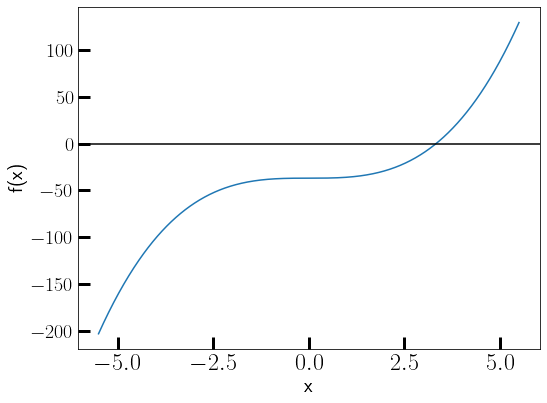

In [166]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

x = np.linspace(-5.5, 5.5, 1000)
plt.plot(x, x**3 - 37)
plt.axhline(y=0, color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [13]:
import numpy as np
from scipy.optimize import bisect, newton

def nr_recur(func, xn, fprime, itr=0, tol=1.48e-8, rtol=0.0, max_iter=1000):
    '''Our own implementation of the
        Newton Raphson Method by recursion'''

    xnp1 = xn - (func(xn)/fprime(xn))    
    itr += 1
    
    if itr >= max_iter:
        msg = (" Failed to converge after %d iterations,\
                    value is %s." % (itr, xnp1))
        raise RuntimeError(msg)
    elif np.isclose(xnp1, xn, rtol=rtol, atol=tol):
        return (xnp1, itr)
    else:
        args = func, xnp1, fprime
        kwargs = {'itr':itr, 'tol':tol, 'rtol':rtol, 'max_iter':max_iter}
        return nr_recur(*args, **kwargs)
    

x0, x1 = 2.0, 5.0

xtol=1e-8

print("Bisection:")
%timeit  bisect(lambda x: x**3 - 37, x0,x1, xtol=xtol, full_output=True)
root, output = bisect(lambda x: x**3 - 37, x0,x1, xtol=xtol, full_output=True)
print("Root of equation after %d bisections = %1.9lf\n" % (output.iterations, root))

print("Newton-Raphson:")
%timeit newton(lambda x: x**3 - 37, x1, fprime=lambda x: 3 * x**2, tol=xtol, full_output=True)
root, output = newton(lambda x: x**3 - 37, x1, fprime=lambda x: 3 * x**2, tol=xtol, full_output=True)
print("Root of equation after %d iterations = %1.9lf\n" % (output.iterations, root))

print("Newton-Raphson via recursion:")
%timeit nr_recur(lambda x: x**3 - 37, x1, lambda x: 3 * x**2, tol=xtol)
root, iters = nr_recur(lambda x: x**3 - 37, x1, lambda x: 3 * x**2, tol=xtol)
print("Root of equation after %d iterations = %1.9lf" % (iters, root))


Bisection:
5.9 µs ± 116 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Root of equation after 29 bisections = 3.332221853

Newton-Raphson:
154 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Root of equation after 6 iterations = 3.332221852

Newton-Raphson via recursion:
141 µs ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Root of equation after 6 iterations = 3.332221852


**Failure of Root-Finding Methods**

### The Problem

Use the bisection method to estimate a root of

\begin{equation*}
f(x) \equiv x^4-4x^3-6x^2-4x+1 = 0
\end{equation*}

Plot the function in order to figure out why bisection fails. Note that the LHS can be simplified to $f(x) = (x-1)^4$. Thus, a bracket with the point $x=1$ in it will always enclose the root.

Then, use the Newton-Raphson method to estimate a root of the function
\begin{equation*}
f(x) = \begin{cases}
        \sqrt{x} & x \geq 0\\
        -\sqrt{-x} & x < 0
        \end{cases}
\end{equation*}

Assume that the desired root is near $x=1$. Plot this function in order to figure out why the Newton-Raphson method fails.

In [154]:
import numpy as np
from scipy.optimize import bisect

func = np.polynomial.Polynomial([1, -4, 6, -4, 1])

root, output = bisect(func, 0.999, 1.001, full_output=True)
print("Root of equation after %d bisections = %lf" % (output.iterations, root))

ValueError: f(a) and f(b) must have different signs

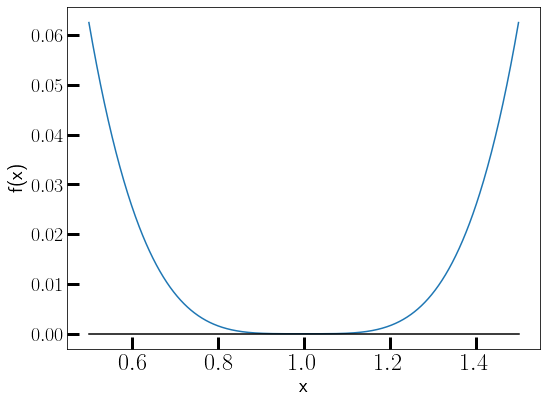

In [113]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

func = np.polynomial.Polynomial([1, -4, 6, -4, 1])

x = np.linspace(0.5, 1.5, 1000)
plt.plot(x, func(x))
plt.plot(x, np.zeros_like(x),'black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [160]:
from scipy.optimize import newton

x0 = 1

def func(x):
    return np.sqrt(x) if x >=0 else -np.sqrt(-x)

def deriv(x):
    return 1/(2*np.sqrt(x)) if x >=0 else 1/(2*np.sqrt(-x))

root, output = newton(func, x0, fprime=deriv, full_output=True)
print("Root of equation after %d iterations = %lf" % (output.iterations, root))

RuntimeError: Failed to converge after 50 iterations, value is 1.0.

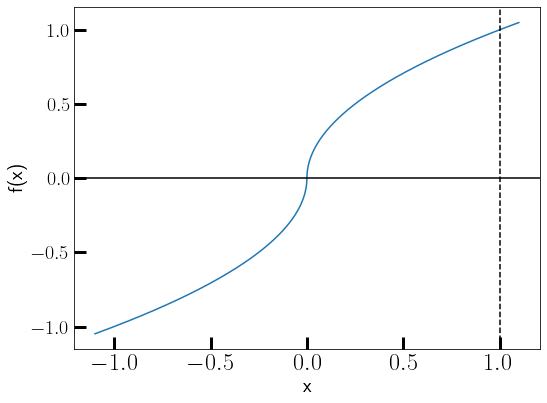

In [164]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

x0, y0 = 1.0, func(1.0)

x = np.linspace(-1.1, 1.1, 1000)
y = [func(xi) for xi in x]
plt.plot(x, y)
plt.axvline(x=x0, ymax=y0, color="black", linestyle="--")
plt.axhline(y=0, color="black", linestyle="-")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

**Ridders' Method**

* From file: [ridders_bisection_nr_comp.py](04-Root_Finding/ridders_bisection_nr_comp.py)

### The Problem:

Find the roots of the function given below by Ridders' method and compare the solution, as well as the computational effort, with the Bisection and Newton-Raphson method. Assume that the root lies in the bracket $x\in[1.0, 1.25]$


\begin{equation*}
x = \frac{7}{5}\tanh{x}
\end{equation*}

In [14]:
import numpy as np
from scipy.optimize import bisect, newton, ridder

x0, x1 = 1.0, 1.25

def func(x):
    return x - (7/5) * np.tanh(x)

def deriv(x):
    return 1 - (7/5) * (1 - np.tanh(x)**2)

tol = 1e-8

print("Bisection:")
%timeit  bisect(func, x0, x1, xtol=tol ,full_output=True)
root, output = bisect(func, x0, x1, xtol=tol, full_output=True)
print("Root of equation after %d bisections = %1.9lf\n" % (output.iterations, root))

print("Newton-Raphson:")
%timeit newton(func, x1, fprime=deriv, tol=tol, full_output=True)
root, output = newton(func, x1, fprime=deriv, full_output=True)
print("Root of equation after %d iterations = %1.9lf\n" % (output.iterations, root))

print("Ridders':")
%timeit ridder(func, x0, x1, xtol=tol, full_output=True)
root, output = ridder(func, x0, x1, xtol=tol, full_output=True)
print("Root of equation after %d iterations = %1.9lf" % (output.iterations, root))

Bisection:
21.5 µs ± 796 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Root of equation after 25 bisections = 1.140339948

Newton-Raphson:
121 µs ± 507 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Root of equation after 4 iterations = 1.140339944

Ridders':
9.01 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Root of equation after 4 iterations = 1.140339939
